In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import numpy as np

In [2]:
model = tf.keras.models.load_model('combine_prediction_model.keras')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                704       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 1

In [3]:
data_2023_combine_df = pd.read_csv('final_dataset.csv')

In [4]:
data_2023_combine_names = data_2023_combine_df[data_2023_combine_df['Year'] == 2023]
data_2023_combine_names = data_2023_combine_names[['Name', 'POS']]
print(data_2023_combine_names.head(10))

                      Name  POS
13544    Israel Abanikanda   RB
13545       Yasir Abdullah  OLB
13546         Devon Achane   RB
13547       Jordan Addison   WR
13548  Adetomiwa Adebawore   DE
13549             Alan Ali    C
13550          Davis Allen   TE
13551          MJ Anderson   DE
13552        Will Anderson   DE
13553         Jake Andrews    C


In [5]:
def standardize_POS(df):
    df['POS'] = df['POS'].replace('FS', 'S')
    df['POS'] = df['POS'].replace('SS', 'S')
    df['POS'] = df['POS'].replace('NT', 'DT')
    df['POS'] = df['POS'].replace('DB', 'CB')
    df['POS'] = df['POS'].replace('DL', 'DT')
    df['POS'] = df['POS'].replace('OL', 'OT')
    df['POS'] = df['POS'].replace('EDG', 'DE')
    df['POS'] = df['POS'].replace('OLB', 'LB')
    df['POS'] = df['POS'].replace('ILB', 'LB')
    df['POS'] = df['POS'].replace('FB', 'RB')
    df['POS'] = df['POS'].replace('P', 'K')
    df['POS'] = df['POS'].replace('LS', 'K')
    return df
data_2023_combine_names = standardize_POS(data_2023_combine_names)
print(data_2023_combine_names.head(10))

                      Name POS
13544    Israel Abanikanda  RB
13545       Yasir Abdullah  LB
13546         Devon Achane  RB
13547       Jordan Addison  WR
13548  Adetomiwa Adebawore  DE
13549             Alan Ali   C
13550          Davis Allen  TE
13551          MJ Anderson  DE
13552        Will Anderson  DE
13553         Jake Andrews   C


In [6]:
data_2023_combine_df = data_2023_combine_df.drop(columns=["Pro Bowl","College", "Name"])
data_2023_combine_df = standardize_POS(data_2023_combine_df)

In [7]:
count_2023 = len(data_2023_combine_df[data_2023_combine_df['Year'] == 2023])

In [8]:
data_2023_combine_df = data_2023_combine_df[data_2023_combine_df['Year'] == 2023]
print(data_2023_combine_df.head(10))

       Year POS  Height (in)  Weight (lbs)  40 Yard  Bench Press  \
13544  2023  RB        70.13           216     4.69           20   
13545  2023  LB        72.63           237     4.47           20   
13546  2023  RB        68.50           188     4.32           20   
13547  2023  WR        71.13           173     4.49           20   
13548  2023  DE        73.63           282     4.49           27   
13549  2023   C        76.25           301     4.69           20   
13550  2023  TE        77.88           246     4.84           20   
13551  2023  DE        74.13           273     5.05           20   
13552  2023  DE        75.50           253     4.60           20   
13553  2023   C        74.75           305     5.15           29   

       Vert Leap (in)  Broad Jump (in)  Shuttle  3Cone  
13544            33.7              119     4.45   7.31  
13545            36.5              129     4.45   7.31  
13546            33.0              119     4.45   7.31  
13547            34.0  

In [9]:
data_2023_combine_df = data_2023_combine_df.drop(columns=["Year"])

In [10]:
sampled_df = pd.read_csv('sampled_data.csv')
sampled_df = sampled_df.drop(columns=["Pro Bowl"])
pred_df = pd.concat([sampled_df, data_2023_combine_df], ignore_index=True)

In [11]:
print(pred_df.head(10))

  POS  Height (in)  Weight (lbs)  40 Yard  Bench Press  Vert Leap (in)  \
0  OT        78.00           321     5.41           20            29.0   
1  LB        73.00           235     4.70           24            33.5   
2  CB        71.00           193     4.56            9            32.0   
3  OT        78.50           290     5.20           22            25.0   
4  RB        71.13           208     4.39           15            37.0   
5  LB        72.60           242     4.78           25            33.0   
6  LB        74.25           243     4.72           24            34.0   
7  WR        72.75           207     4.58           22            34.0   
8  OG        76.75           352     5.31           30            34.0   
9  LB        72.88           222     4.59           16            33.0   

   Broad Jump (in)  Shuttle  3Cone  
0              102     4.90   8.23  
1              114     4.33   7.31  
2              114     4.29   7.31  
3               99     4.83   7.31  


In [12]:
categorical_col = ['POS']
encoder = OneHotEncoder()
encoded_features = encoder.fit_transform(pred_df[categorical_col]).toarray()

In [13]:
numerical_col = ["Height (in)", "Weight (lbs)", "40 Yard", "Bench Press", "Vert Leap (in)", "Broad Jump (in)", "Shuttle", "3Cone"]
scalar = StandardScaler()
scaled_numerical_features = scalar.fit_transform(pred_df[numerical_col])

In [14]:
pred_data = pd.concat([pd.DataFrame(encoded_features), pd.DataFrame(scaled_numerical_features)], axis=1)
print(pred_data.head(10))

    0    1    2    3    4    5    6    7    8    9   ...   11   12        0   \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  1.571220   
1  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0 -0.323833   
2  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0 -1.081855   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  1.760726   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0 -1.032583   
5  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0 -0.475438   
6  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.149930   
7  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  1.0 -0.418586   
8  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  1.097457   
9  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0 -0.369315   

         1         2         3         4         5         6         7   
0  1.807424  2.284238 -0.011527 -0.968484 -1.

In [15]:
pred_input = pred_data.tail(count_2023)
print(pred_input.head(10))

       0    1    2    3    4    5    6    7    8    9   ...   11   12  \
1840  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0   
1841  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1842  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0   
1843  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  1.0   
1844  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1845  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1846  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  0.0   
1847  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1848  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1849  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   

            0         1         2         3         4         5         6   \
1840 -1.411594 -0.543852 -0.286297 -0.011527  0.221252  0.467288  0.218578   
1841 -0.464067 -0.073597 -1.071738 -0.01

In [16]:
X_predict = np.array(pred_input)

In [17]:
prediction = model.predict(X_predict)
print("prediction:", prediction)

10/10 [==============================] - 0s 889us/step
prediction: [[0.40311098]
 [0.59222656]
 [0.5083741 ]
 [0.3912773 ]
 [0.86338055]
 [0.6689528 ]
 [0.41916162]
 [0.30785924]
 [0.6238051 ]
 [0.58256465]
 [0.55089116]
 [0.39883256]
 [0.49659428]
 [0.6869001 ]
 [0.45042652]
 [0.26922324]
 [0.5322105 ]
 [0.6603334 ]
 [0.6319876 ]
 [0.34911972]
 [0.2629504 ]
 [0.4105496 ]
 [0.589487  ]
 [0.5173887 ]
 [0.6279782 ]
 [0.43334234]
 [0.48983097]
 [0.83755124]
 [0.4264278 ]
 [0.4462993 ]
 [0.27410156]
 [0.50332636]
 [0.31784177]
 [0.38586667]
 [0.72497183]
 [0.36073798]
 [0.5756852 ]
 [0.5884974 ]
 [0.27266085]
 [0.3220936 ]
 [0.5205844 ]
 [0.4989336 ]
 [0.6349185 ]
 [0.36713427]
 [0.6102796 ]
 [0.42813182]
 [0.45552078]
 [0.6498645 ]
 [0.51231754]
 [0.75530845]
 [0.59261894]
 [0.44796684]
 [0.50231504]
 [0.48152024]
 [0.6301339 ]
 [0.47550058]
 [0.48105702]
 [0.47179508]
 [0.3490788 ]
 [0.59574217]
 [0.4365345 ]
 [0.39585093]
 [0.33750898]
 [0.42651102]
 [0.3659239 ]
 [0.6430786 ]
 [0.78858

In [18]:
print(type(prediction))
prediction_df = pd.DataFrame(prediction, columns=['Prediction Scores'])

<class 'numpy.ndarray'>


In [19]:
prediction_df.reset_index(drop=True, inplace=True)
data_2023_combine_names.reset_index(drop=True, inplace=True)

In [20]:
combine2023_predictions = pd.concat([data_2023_combine_names, prediction_df], axis=1)
combine2023_predictions.to_csv('combine2023_preds.csv', index=False)
print(combine2023_predictions.head(10))

                  Name POS  Prediction Scores
0    Israel Abanikanda  RB           0.403111
1       Yasir Abdullah  LB           0.592227
2         Devon Achane  RB           0.508374
3       Jordan Addison  WR           0.391277
4  Adetomiwa Adebawore  DE           0.863381
5             Alan Ali   C           0.668953
6          Davis Allen  TE           0.419162
7          MJ Anderson  DE           0.307859
8        Will Anderson  DE           0.623805
9         Jake Andrews   C           0.582565


In [21]:
combine2023_predictions = combine2023_predictions.sort_values(by='Prediction Scores', ascending=False)
print("Top 10 Player predictions:")
print(combine2023_predictions.head(10))
print("Bottom 10 Player predictions:")
print(combine2023_predictions.tail(10))

Top 10 Player predictions:
                    Name POS  Prediction Scores
135        Paris Johnson  OT           0.872578
239      Trenton Simpson  LB           0.872318
4    Adetomiwa Adebawore  DE           0.863381
220   Anthony Richardson  QB           0.852970
279       Andrew Vorhees  OG           0.848061
150      Jaxson Kirkland  OT           0.841704
265         Joe Tippmann   C           0.841287
27      Matthew Bergeron  OT           0.837551
153           Zack Kuntz  TE           0.834250
82    Bryce Ford-Wheaton  WR           0.816875
Bottom 10 Player predictions:
                Name POS  Prediction Scores
32    Kayshon Boutte  WR           0.317842
7        MJ Anderson  DE           0.307859
76        Mark Evans  OG           0.300738
87     Connor Galvin  OT           0.300426
192     PJ Mustipher  DT           0.285222
30         Jake Bobo  TE           0.274102
38      Nick Broeker  OG           0.272661
15   Henry Bainivalu  OG           0.269223
20         T.J. Bas

In [22]:
player_POS = ['RB', 'WR', 'LB', 'CB', 'DE', 'OT', 'QB', 'S', 'DT', 'TE', 'OG', 'C']

In [23]:
colors = []
for score in combine2023_predictions['Prediction Scores']:
    if round(score, 2) <= 0.24:
        colors.append('salmon')
    elif round(score,2) >= 0.25 and round(score,2) <= 0.49:
        colors.append('peachpuff')
    elif 0.50 <= round(score, 2) and round(score, 2) <= 0.74:
        colors.append('skyblue')
    elif 0.75 <= round(score, 2):
        colors.append('seagreen')
    else:
        colors.append('gray')
combine2023_predictions['Color'] = colors
print(combine2023_predictions)

                    Name POS  Prediction Scores      Color
135        Paris Johnson  OT           0.872578   seagreen
239      Trenton Simpson  LB           0.872318   seagreen
4    Adetomiwa Adebawore  DE           0.863381   seagreen
220   Anthony Richardson  QB           0.852970   seagreen
279       Andrew Vorhees  OG           0.848061   seagreen
..                   ...  ..                ...        ...
30             Jake Bobo  TE           0.274102  peachpuff
38          Nick Broeker  OG           0.272661  peachpuff
15       Henry Bainivalu  OG           0.269223  peachpuff
20             T.J. Bass  OG           0.262950  peachpuff
123            Siaki Ika  DT           0.247407  peachpuff

[306 rows x 4 columns]


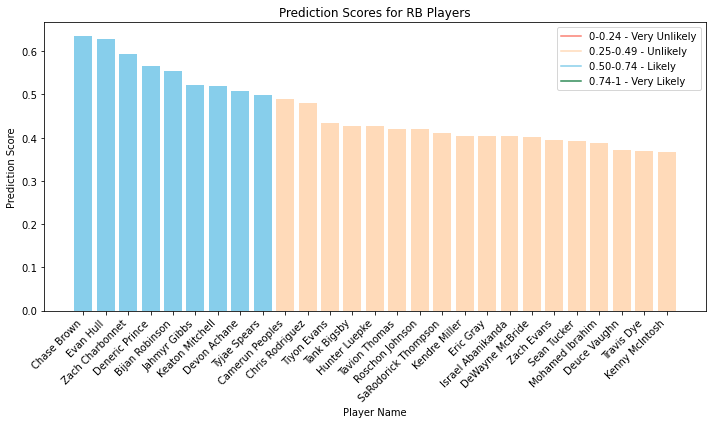

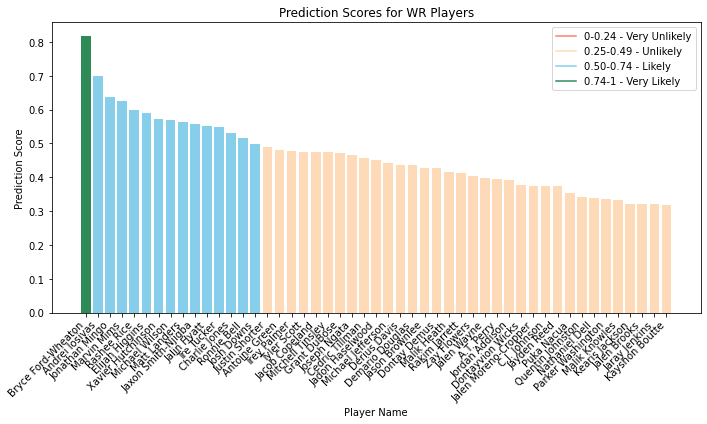

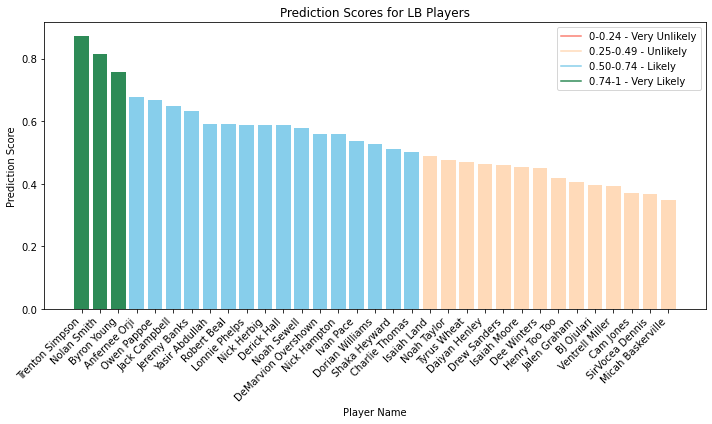

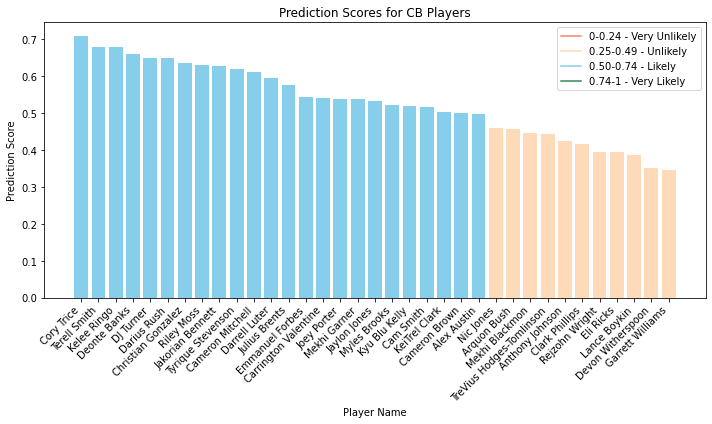

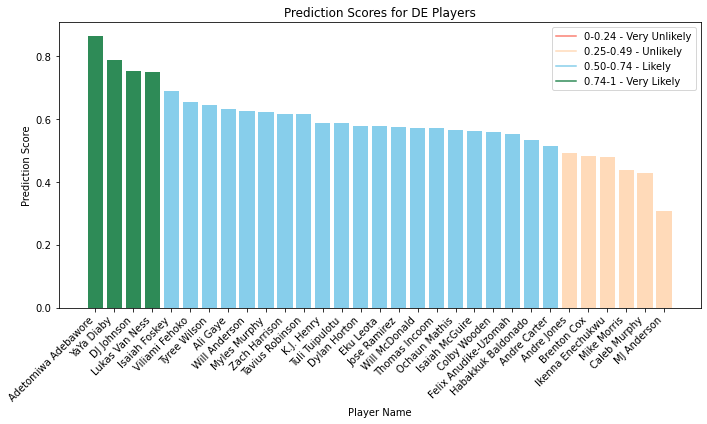

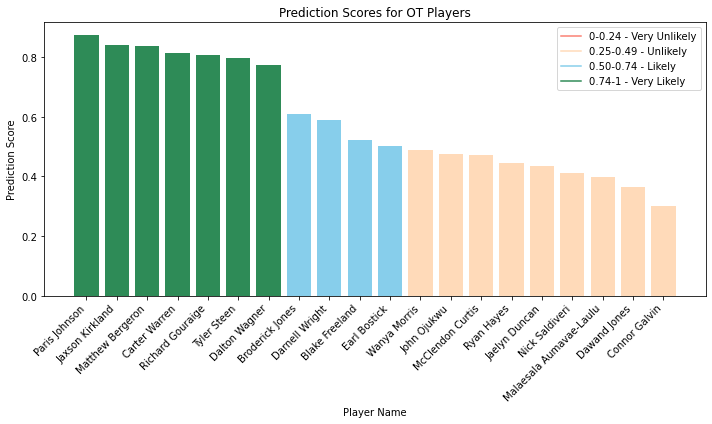

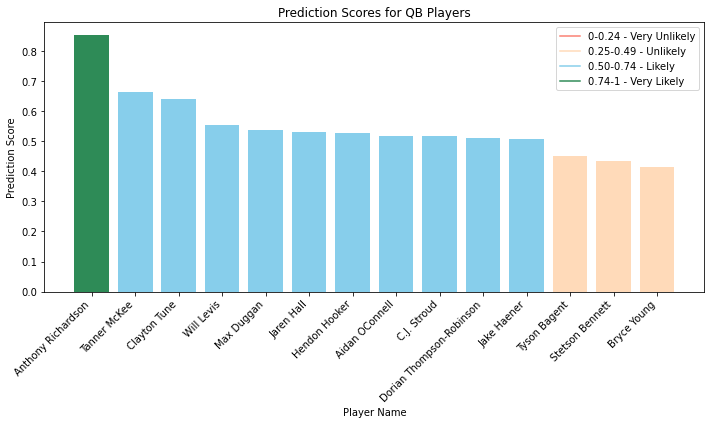

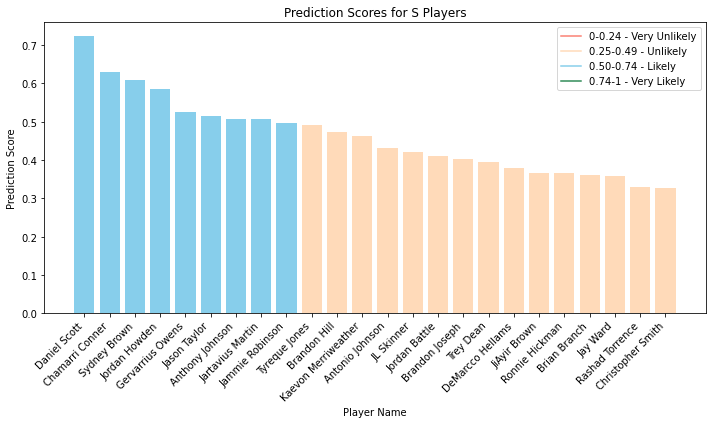

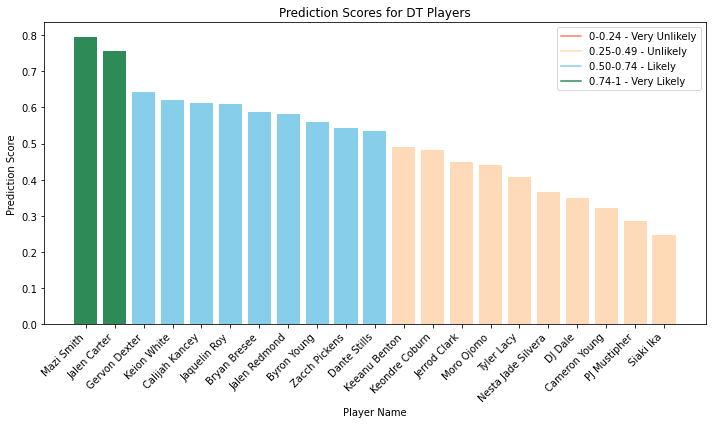

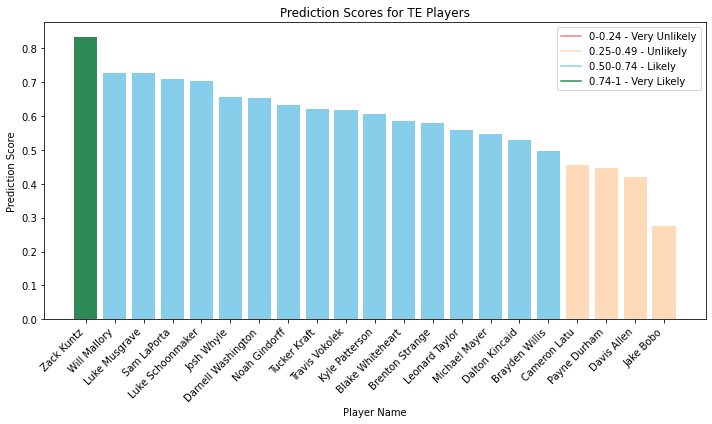

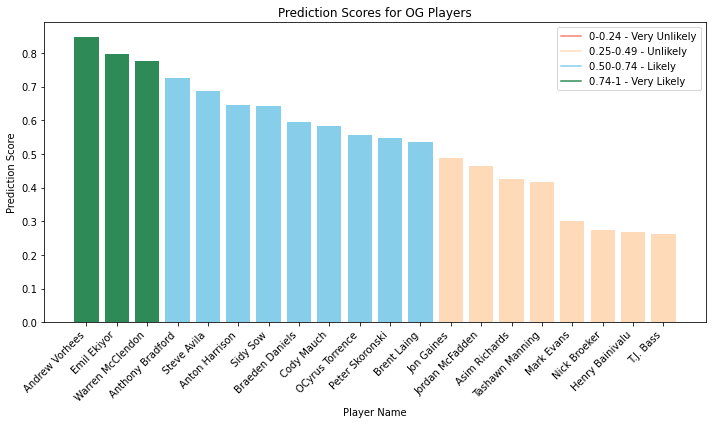

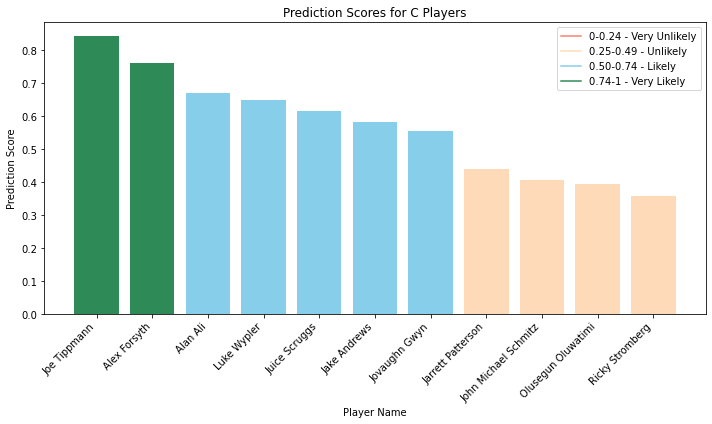

In [24]:
for position in player_POS:
    position_data = combine2023_predictions[combine2023_predictions['POS'] == position]
    
    plt.figure(figsize=(10, 6))
    plt.bar(position_data['Name'], position_data['Prediction Scores'], color=position_data['Color'])
    plt.xlabel('Player Name')
    plt.ylabel('Prediction Score')
    plt.title(f'Prediction Scores for {position} Players')
    plt.xticks(rotation=45, ha='right')
    red_leg = plt.Line2D([0], [0], color='salmon', label='0-0.24 - Very Unlikely')
    yellow_leg = plt.Line2D([0], [0], color='peachpuff', label='0.25-0.49 - Unlikely')
    blue_leg = plt.Line2D([0], [0], color='skyblue', label='0.50-0.74 - Likely')
    green_leg = plt.Line2D([0], [0], color='seagreen', label='0.74-1 - Very Likely')
    plt.legend(handles=[red_leg, yellow_leg, blue_leg, green_leg], loc='upper right')
    
    plt.tight_layout()
    plt.show()